In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
samsung_mobiles_data = pd.read_csv('data/samsungMobilesData.csv')

# Data Exploration

In [3]:
samsung_mobiles_data.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [4]:
samsung_mobiles_data.drop(['name', 'imgURL'], axis=1, inplace=True)
samsung_mobiles_data.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [5]:
samsung_mobiles_data.shape

(407, 9)

In [6]:
samsung_mobiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ratings          407 non-null    float64
 1   price            407 non-null    int64  
 2   camera           407 non-null    int64  
 3   display          407 non-null    object 
 4   battery          407 non-null    int64  
 5   storage          407 non-null    int64  
 6   ram              407 non-null    int64  
 7   processor        407 non-null    object 
 8   android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 28.7+ KB


In [7]:
samsung_mobiles_data.describe()

,ratings,price,camera,battery,storage,ram,android_version
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.19828,17363.245700,43.660934,4946.437346,106.199017,5.493857,10.847666
std,0.17762,6735.647203,25.189978,878.467561,58.899992,2.185789,1.829261
min,2.90000,6490.000000,0.000000,1500.000000,1.000000,1.000000,1.000000
25%,4.10000,11982.500000,20.000000,4500.000000,64.000000,4.000000,10.000000
50%,4.20000,15999.000000,48.000000,5000.000000,128.000000,6.000000,11.000000
75%,4.30000,21744.500000,50.000000,5500.000000,128.000000,6.000000,12.000000
max,4.80000,32000.000000,200.000000,7000.000000,512.000000,12.000000,13.000000


In [8]:
samsung_mobiles_data['display'].value_counts()

display
other_types    250
LCD             70
HD+ AMOLED      43
AMOLED          39
TFT              5
Name: count, dtype: int64

In [9]:
samsung_mobiles_data['processor'].value_counts()

processor
not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080,              12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: count, dtype: int64

In [10]:
samsung_mobiles_data[(samsung_mobiles_data['display'] == 'other_types') & (samsung_mobiles_data['processor'] == 'not mentioned')].shape

(185, 9)

In [11]:
samsung_mobiles_data['processor'] = samsung_mobiles_data['processor'].str.replace('Dimensity1080,','Dimensity1080')

In [12]:
samsung_mobiles_data['processor'].value_counts()

processor
not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080               12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: count, dtype: int64

In [13]:
processed_data = pd.get_dummies(samsung_mobiles_data, columns = ['display','processor'],drop_first = True)

In [14]:
processed_data.head()

,ratings,price,camera,battery,storage,ram,android_version,display_HD+ AMOLED,display_LCD,display_TFT,...,processor_Snapdragon410,processor_Snapdragon425P,processor_Snapdragon450,processor_Snapdragon450P,processor_Snapdragon695,processor_Snapdragon720GProcessor,processor_Snapdragon750G,processor_Snapdragon750GProcessor,processor_Snapdragon888,processor_not mentioned
0,4.3,9499,50,6000,64,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4.3,15499,50,5000,128,6,12,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Setting up the data

In [15]:
X = processed_data.drop('price',axis = 1 )
y = processed_data['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size = 0.7 , random_state = 42)

# Scale the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()

X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

In [17]:
X_train.shape

(284, 32)

# Model Building

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [19]:
model = Sequential([
    Dense(200, activation = tf.keras.activations.relu),
    Dense(200, activation = tf.keras.activations.relu),
    Dense(50, activation = tf.keras.activations.relu),
    Dense(50, activation = tf.keras.activations.relu),
    Dense(10, activation = tf.keras.activations.relu),
    Dense(1)
])

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 500, verbose = 0)

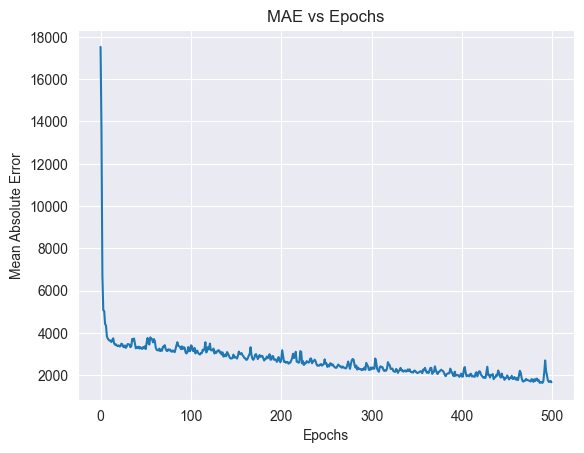

In [20]:
# Chart of mae
plt.plot(model_history.history['mae'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs Epochs')
plt.show()

In [21]:
model_history.history['mae'][-1]

1671.2640380859375

In [22]:
# MAE of the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


2913.8261480564024